# Diffusion-Reaction

$\frac{du}{dt} = \frac{d^2u}{dx^2} + ru(1-u)$\
$u(x, 0) = sin(\pi x)$\
$u(0, t) = u(1, t) = 0$ (Dirichlet Boundary Condition)\
$u_m^{(n)} = u(m\Delta x, n\Delta t)$\
$u_m^{(n+1)} = u_m^{(n)} + \frac{\Delta t}{\Delta x^2}(u_{m-1}^{(n)} + u_{m+1}^{(n)} - 2u_m^{(n)}) + \Delta t \cdot r\cdot u_m^{(n)}(1-u_m^{(n)})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
r = 2
dx = 0.05
dt = 0.0005
M = int(1/dx)
N = int(1/dt)
Mat = np.zeros((N+1, M+1))
# Mat[n][m] = u(m*dx, n*dt)

# Initial Condition
for i in range(M):
    Mat[0][i] = math.sin(math.pi*i*dx)

In [3]:
# FDM Iteration for Diffusion-Reaction
for n in range(N):
    for m in range(1,M):
        Mat[n+1][m] = Mat[n][m] + (dt/dx**2)*(Mat[n][m-1]+Mat[n][m+1]-2*Mat[n][m]) + dt*r*Mat[n][m]*(1-Mat[n][m])

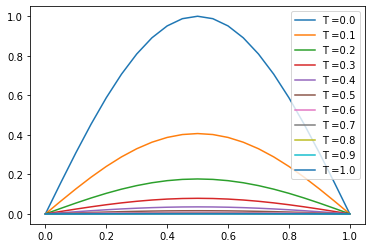

In [4]:
Timestamp = [n for n in range(0,N+1,200)]
X = np.array([m*dx for m in range(M+1)])

# for i in Timestamp:
#     print('T =', round(i*dt,1))
#     plt.figure()
#     plt.plot(X, Mat[i], label='FDM')
#     plt.legend()
#     plt.show()

plt.figure()
for i in Timestamp:
    plt.plot(X, Mat[i], label='T ='+str(round(i*dt,1)))
plt.legend()
plt.show()   

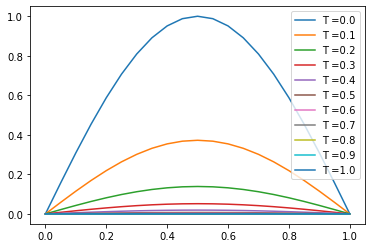

In [5]:
# FDM Iteration for Diffusion
Mat_d = np.zeros((N+1, M+1))
for i in range(M):
    Mat_d[0][i] = math.sin(math.pi*i*dx)

for n in range(N):
    for m in range(1,M):
        Mat_d[n+1][m] = Mat_d[n][m] + (dt/dx**2)*(Mat_d[n][m-1]+Mat_d[n][m+1]-2*Mat_d[n][m])
        
plt.figure()
for i in Timestamp:
    plt.plot(X, Mat_d[i], label='T ='+str(round(i*dt,1)))
plt.legend()
plt.show() 

In [6]:
# plt.figure()
# for i in Timestamp:
#     plt.plot(X, Mat[i], label='T ='+str(round(i*dt,1)))
#     plt.plot(X, Mat_d[i], label='D-T ='+str(round(i*dt,1)))
# plt.legend()
# plt.show() 

## Change Initial Condition

$\frac{du}{dt} = \frac{d^2u}{dx^2} + ru(1-u)$\
Initial condition:\
$u(x, 0) = 1$ if $x \leq 0.2$\
$u(x, 0) = 0$ otherwise\
Boundary condition:\
$u(0, t) = 1$\
$u(1, t) = 0$

In [7]:
r = 2
dx = 0.05
dt = 0.0005
M = int(1/dx)*20
N = int(1/dt)*10
Mat = np.zeros((N+1, M+1))

LevelSet = np.zeros(N+1)

# Initial Condition
for i in range(M):
    if i <= 0.02*M:
        Mat[0][i] = 1
    else:
        Mat[0][i] = 0
        
# Boundary Condition:
for j in range(N+1):
    Mat[j][0] = 1

In [8]:
Mat

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [9]:
def binary_search(lst, value):
    length = len(lst)
    left = 0
    right = length -1
    while left < right:
        mid = (left + right)//2
        if lst[mid] == value:
            return mid
        elif lst[mid] > value:
            if lst[mid+1] < value:
                return mid
            left = mid
        elif lst[mid] < value:
            if lst[mid-1] > value:
                return mid
            right = mid
    return mid

In [10]:
# Loop in the time dimension
for n in range(N):
    # Loop in the space dimension
    for m in range(1,M):
        Mat[n+1][m] = Mat[n][m] + (dt/dx**2)*(Mat[n][m-1]+Mat[n][m+1]-2*Mat[n][m]) + dt*r*Mat[n][m]*(1-Mat[n][m])
    LevelSet[n] = binary_search(Mat[n],0.5)

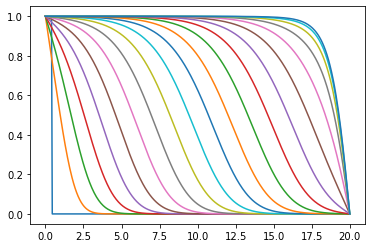

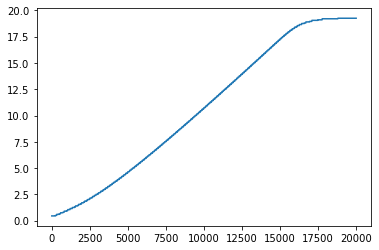

In [27]:
Timestamp = [n for n in range(0,N+1,200)]
X = np.array([m*dx for m in range(M+1)])

# plt.figure()
# for i in Timestamp:
# #     plt.plot(X, Mat[i], label='T ='+str(round(i*dt,1)))
#     plt.plot(X, Mat[i])

plt.figure()
count = 0
for i in Timestamp:
#     plt.plot(X, Mat[i], label='T ='+str(round(i*dt,1)))
    if count % 5 == 0:
        plt.plot(X, Mat[i])
    count += 1
    
# plt.legend()
# plt.show()
plt.savefig('travellingWave.png')

plt.figure()
plt.plot(range(len(LevelSet)-1), LevelSet[:-1]/20)
# plt.show()
plt.savefig('waveSpeed.png')